# Final Project
**Oriana Meldrum**


**Research Question:** Can we understand the impacts of COVID-19 vaccination rates between different countries? Given that we are now seeing rapid expansion of vaccine distribution among the general public in the United States, it will be interesting to see the trends as those who want the vaccine and how quickly those who are more hesitant are encouraged to get the vaccine. It will also be interesting to see the differences between different countries and their commitment to the distribution efforts.

Inspired by: https://www.npr.org/sections/health-shots/2021/01/28/960901166/how-is-the-covid-19-vaccination-campaign-going-in-your-state



In [2]:


import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pylab as plt


**Read Data**


Data is collected daily from Our World in Data GitHub repository for covid-19, merged and uploaded. I will note the day that I begin the project, and if I keep the same data throughout the project or if I choose to get the updated information. 

In [4]:


url = 'https://raw.githubusercontent.com/omeldrum/DSCI235_Final_Project/master/country_vaccinations.csv'
data = pd.read_csv(url)
data.head()
data.info

<bound method DataFrame.info of            country iso_code        date  total_vaccinations  \
0      Afghanistan      AFG  2021-02-22                 0.0   
1      Afghanistan      AFG  2021-02-23                 NaN   
2      Afghanistan      AFG  2021-02-24                 NaN   
3      Afghanistan      AFG  2021-02-25                 NaN   
4      Afghanistan      AFG  2021-02-26                 NaN   
...            ...      ...         ...                 ...   
15661     Zimbabwe      ZWE  2021-05-02            524199.0   
15662     Zimbabwe      ZWE  2021-05-03            537516.0   
15663     Zimbabwe      ZWE  2021-05-04            559777.0   
15664     Zimbabwe      ZWE  2021-05-05            576233.0   
15665     Zimbabwe      ZWE  2021-05-06            607355.0   

       people_vaccinated  people_fully_vaccinated  daily_vaccinations_raw  \
0                    0.0                      NaN                     NaN   
1                    NaN                      NaN        

**Exploratory Analysis**

Set up indiviudal country data frames
Columns of intrest include
    total_vaccinations_per_hundred
    total_vaccinations
    daily_vaccinations
    daily_vaccinations_per_million
    people_vaccinated_per_hundred
    
    
    

In [17]:

#Set dates to dates
data['date'] = pd.to_datetime(data['date'])
#Combine vaccination frame with brand frame

#assignment 3

#Set up individual country data frames
df_us = data[ data['country'] == 'United States']
df_is = data[ data['country'] == 'Israel']
df_ir = data[ data['country'] == 'Ireland']
df_jp = data[ data['country'] == 'Japan']
df_ch = data[ data['country'] == 'China']
df_sa = data[ data['country'] == 'South Africa']
df_bz = data[ data['country'] == 'Brazil' ]

df_is

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
6992,Israel,ISR,2020-12-19,61.0,61.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
6993,Israel,ISR,2020-12-20,7436.0,7436.0,NaN,7375.0,7375.0,0.09,0.09,NaN,852.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
6994,Israel,ISR,2020-12-21,32318.0,32318.0,NaN,24882.0,16128.0,0.37,0.37,NaN,1863.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
6995,Israel,ISR,2020-12-22,76938.0,76938.0,NaN,44620.0,25626.0,0.89,0.89,NaN,2961.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
6996,Israel,ISR,2020-12-23,139779.0,139779.0,NaN,62841.0,34930.0,1.61,1.61,NaN,4036.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7126,Israel,ISR,2021-05-02,10459346.0,5404275.0,5055071.0,9087.0,8726.0,120.84,62.44,58.40,1008.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
7127,Israel,ISR,2021-05-03,10468341.0,5407666.0,5060675.0,8995.0,8185.0,120.94,62.48,58.47,946.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
7128,Israel,ISR,2021-05-04,10476214.0,5411033.0,5065181.0,7873.0,7774.0,121.03,62.52,58.52,898.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...
7129,Israel,ISR,2021-05-05,10482976.0,5414047.0,5068929.0,6762.0,7118.0,121.11,62.55,58.56,822.0,"Moderna, Pfizer/BioNTech",Government of Israel,https://datadashboard.health.gov.il/COVID-19/g...


Check for & remove null rows

In [8]:

df_us = df_us[df_us['total_vaccinations_per_hundred'].notna()]
df_is = df_is[df_is['total_vaccinations_per_hundred'].notna()]
df_ir = df_ir[df_ir['total_vaccinations_per_hundred'].notna()]
df_jp = df_jp[df_jp['total_vaccinations_per_hundred'].notna()]
df_ch = df_ch[df_ch['total_vaccinations_per_hundred'].notna()]
df_sa = df_sa[df_sa['total_vaccinations_per_hundred'].notna()]
df_bz = df_bz[df_bz['total_vaccinations_per_hundred'].notna()]




What brands of vaccine are used? Here, we use the second data set, information about the vaccines in use by each country. 

In [10]:
url2 = 'https://raw.githubusercontent.com/omeldrum/DSCI235_Final_Project/master/country_vaccinations_by_manufacturer.csv'
data2 = pd.read_csv(url2)

data2.head()


,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5198
2,Chile,2020-12-26,Pfizer/BioNTech,8338
3,Chile,2020-12-27,Pfizer/BioNTech,8649
4,Chile,2020-12-28,Pfizer/BioNTech,8649


In [12]:
df_us2 = data2[ data2['location'] == 'United States']
df_is2 = data2[ data2['location'] == 'Israel']
df_ir2 = data2[ data2['location'] == 'Ireland']
df_jp2 = data2[ data2['location'] == 'Japan']
df_ch2 = data2[ data2['location'] == 'China']
df_sa2 = data2[ data2['location'] == 'South Africa']
df_bz2 = data2[ data2['location'] == 'Brazil' ]




brands = pd.DataFrame([df_us['vaccines'].unique(), df_is['vaccines'].unique(), df_ir['vaccines'].unique(), df_jp['vaccines'].unique(), df_ch['vaccines'].unique(), df_sa['vaccines'].unique(), df_bz['vaccines'].unique()],columns=['Vaccine'],index=['United States', 'Israel', 'Ireland', 'Japan', 'China', 'South Africa', 'Brazil'])
brands

,Vaccine
United States,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Israel,"Moderna, Pfizer/BioNTech"
Ireland,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Japan,Pfizer/BioNTech
China,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac"
South Africa,Johnson&Johnson
Brazil,"Oxford/AstraZeneca, Sinovac"


Total Vaccinations plot: 
Here we compare the number of vaccinations given by each country since January 2021. While China has given out the most vaccines, it is important to note how many more residents they have when compared to the other countries. 

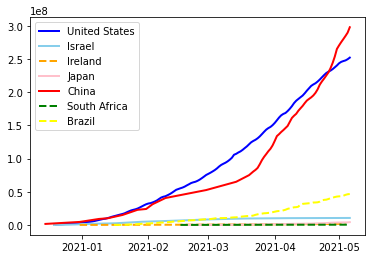

In [13]:


# multiple line plots
plt.plot( 'date', 'total_vaccinations', data=df_us, marker='',  color='blue', linewidth=2,  label="United States")
plt.plot( 'date', 'total_vaccinations', data=df_is, marker='', color='skyblue', linewidth=2, label="Israel")
plt.plot( 'date', 'total_vaccinations', data=df_ir, marker='', color='orange', linewidth=2, linestyle='dashed', label="Ireland")
plt.plot( 'date', 'total_vaccinations', data=df_jp, marker='',  color='pink', linewidth=2,  label="Japan")
plt.plot( 'date', 'total_vaccinations', data=df_ch, marker='', color='red', linewidth=2, label="China")
plt.plot( 'date', 'total_vaccinations', data=df_sa, marker='', color='green', linewidth=2, linestyle='dashed', label="South Africa")
plt.plot( 'date', 'total_vaccinations', data=df_bz, marker='', color='yellow', linewidth=2, linestyle='dashed', label="Brazil")

# show legend
plt.legend()

# show graph
plt.show()

Because of the issues with population size, we create a new coulmn in the data frames that devides the number of vaccines given by the population of each country (source: https://www.worldometers.info/world-population/population-by-country/) 

In [51]:
df_us['percent_pop'] =(df_us['total_vaccinations']/331002651)*100
df_is['percent_pop'] =(df_is['total_vaccinations']/8655535)*100
df_ir['percent_pop'] =(df_ir['total_vaccinations']/4937786)*100
df_jp['percent_pop'] =(df_jp['total_vaccinations']/126476461)*100
df_ch['percent_pop'] =(df_ch['total_vaccinations']/1439323776)*100
df_sa['percent_pop'] =(df_sa['total_vaccinations']/59308690)*100
df_bz['percent_pop'] =(df_bz['total_vaccinations']/212559417)*100

df_sa.head()

<ipython-input-51-2dacf7a79d79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['percent_pop'] =(df_us['total_vaccinations']/331002651)*100
<ipython-input-51-2dacf7a79d79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_is['percent_pop'] =(df_is['total_vaccinations']/8655535)*100
<ipython-input-51-2dacf7a79d79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,percent_pop
13438,South Africa,ZAF,2021-02-16,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Johnson&Johnson,Ministry of Health,https://sacoronavirus.co.za/,0.000000
13439,South Africa,ZAF,2021-02-17,NaN,NaN,NaN,NaN,1130.0,NaN,NaN,NaN,19.0,Johnson&Johnson,Ministry of Health,https://sacoronavirus.co.za/,NaN
13440,South Africa,ZAF,2021-02-18,2260.0,2260.0,2260.0,NaN,1130.0,0.00,0.00,0.00,19.0,Johnson&Johnson,Ministry of Health,https://sacoronavirus.co.za/,0.003811
13441,South Africa,ZAF,2021-02-19,6524.0,6524.0,6524.0,4264.0,2175.0,0.01,0.01,0.01,37.0,Johnson&Johnson,Ministry of Health,https://sacoronavirus.co.za/,0.011000
13442,South Africa,ZAF,2021-02-20,10414.0,10414.0,10414.0,3890.0,2604.0,0.02,0.02,0.02,44.0,Johnson&Johnson,Ministry of Health,https://sacoronavirus.co.za/,0.017559


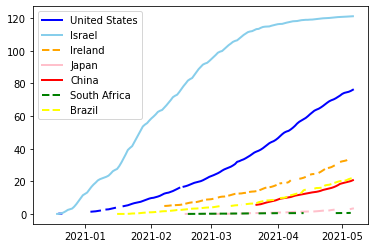

In [52]:
# multiple line plots
plt.plot( 'date', 'percent_pop', data=df_us, marker='',  color='blue', linewidth=2,  label="United States")
plt.plot( 'date', 'percent_pop', data=df_is, marker='', color='skyblue', linewidth=2, label="Israel")
plt.plot( 'date', 'percent_pop', data=df_ir, marker='', color='orange', linewidth=2, linestyle='dashed', label="Ireland")
plt.plot( 'date', 'percent_pop', data=df_jp, marker='',  color='pink', linewidth=2,  label="Japan")
plt.plot( 'date', 'percent_pop', data=df_ch, marker='', color='red', linewidth=2, label="China")
plt.plot( 'date', 'percent_pop', data=df_sa, marker='', color='green', linewidth=2, linestyle='dashed', label="South Africa")
plt.plot( 'date', 'percent_pop', data=df_bz, marker='', color='yellow', linewidth=2, linestyle='dashed', label="Brazil")

# show legend
plt.legend()

# show graph
plt.show()

Here we see something very intresting. It would appear that Israel has vaccinated 120% of their population. But how can this be? This is an interpretation issue. The graph shows the total number of vaccines given, not how many people have been fully vaccinated. This is also why it appears that the US has about 75% vaccincation, when it is actully only about 38% as of May 9th (source: https://www.npr.org/sections/health-shots/2021/01/28/960901166/how-is-the-covid-19-vaccination-campaign-going-in-your-state). So while the intent of this graph was good, its information is faulty. 

**Daily Vaccinations** A good measure of how well vaccines are being rolled out is a contined increase in the number of vaccines given each day. 

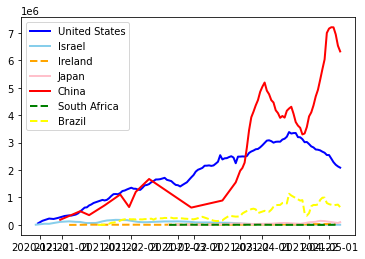

In [14]:

# multiple line plots
plt.plot( 'date', 'daily_vaccinations', data=df_us, marker='',  color='blue', linewidth=2,  label="United States")
plt.plot( 'date', 'daily_vaccinations', data=df_is, marker='', color='skyblue', linewidth=2, label="Israel")
plt.plot( 'date', 'daily_vaccinations', data=df_ir, marker='', color='orange', linewidth=2, linestyle='dashed', label="Ireland")
plt.plot( 'date', 'daily_vaccinations', data=df_jp, marker='',  color='pink', linewidth=2,  label="Japan")
plt.plot( 'date', 'daily_vaccinations', data=df_ch, marker='', color='red', linewidth=2, label="China")
plt.plot( 'date', 'daily_vaccinations', data=df_sa, marker='', color='green', linewidth=2, linestyle='dashed', label="South Africa")
plt.plot( 'date', 'daily_vaccinations', data=df_bz, marker='', color='yellow', linewidth=2, linestyle='dashed', label="Brazil")

# show legend
plt.legend()

# show graph
plt.show()


Here we can see that for most countries, the number of vaccinations given has begun to slow down. This is concerning for the goal of reaching herd immunity or the goal of getting 70% of the population vaccinated. Intrestingly, Israel, South Africa and Ireland appear to be holding flat in the number of vaccines they give per day. However, these countries have smaller populations when comared to the United States and China, so it is better to seperate them out to comapre them aginst each other. 

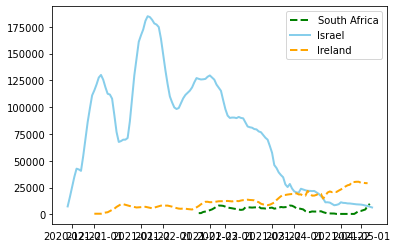

In [50]:
plt.plot( 'date', 'daily_vaccinations', data=df_sa, marker='', color='green', linewidth=2, linestyle='dashed', label="South Africa")
plt.plot( 'date', 'daily_vaccinations', data=df_is, marker='', color='skyblue', linewidth=2, label="Israel")
plt.plot( 'date', 'daily_vaccinations', data=df_ir, marker='', color='orange', linewidth=2, linestyle='dashed', label="Ireland")
# show legend
plt.legend()

# show graph
plt.show()

When compared to the smaller countries, we can see how quickly Israel rolled out their vaccination program, and how it is now dropping off. However, this is not cause for concern as Israel has enough of their population now vaccinated as they may have reached herd immunity (source: https://www.bbc.com/news/health-56722186) 

**People vaccinated per hundred** Ratio (in percent) between population immunized and total population up to the date in the country. This is the actual ratio that we were trying to predict before. 

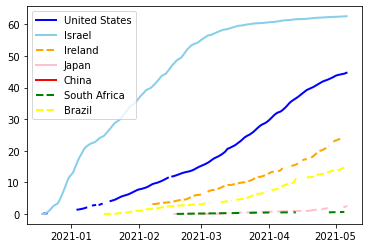

In [18]:

# multiple line plots
plt.plot( 'date', 'people_vaccinated_per_hundred', data=df_us, marker='',  color='blue', linewidth=2,  label="United States")
plt.plot( 'date', 'people_vaccinated_per_hundred', data=df_is, marker='', color='skyblue', linewidth=2, label="Israel")
plt.plot( 'date', 'people_vaccinated_per_hundred', data=df_ir, marker='', color='orange', linewidth=2, linestyle='dashed', label="Ireland")
plt.plot( 'date', 'people_vaccinated_per_hundred', data=df_jp, marker='',  color='pink', linewidth=2,  label="Japan")
plt.plot( 'date', 'people_vaccinated_per_hundred', data=df_ch, marker='', color='red', linewidth=2, label="China")
plt.plot( 'date', 'people_vaccinated_per_hundred', data=df_sa, marker='', color='green', linewidth=2, linestyle='dashed', label="South Africa")
plt.plot( 'date', 'people_vaccinated_per_hundred', data=df_bz, marker='', color='yellow', linewidth=2, linestyle='dashed', label="Brazil")

# show legend
plt.legend()

# show graph
plt.show()

Sadly, the data is not aviable for China. However, it is hearting to see that all countries (with the exception of Israel) are increasing the precent of their population immunized. 

My next question is how are the countries doing with their daily vaccination rates? Are there more days with more vaccinations? As we look at the graphs below, it is important to note that each has their own x-axis scale and thus cannot be compared directly. 

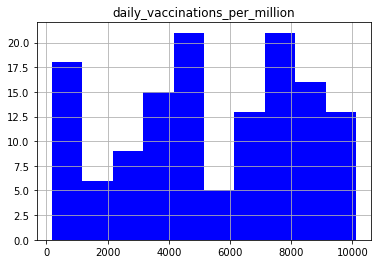

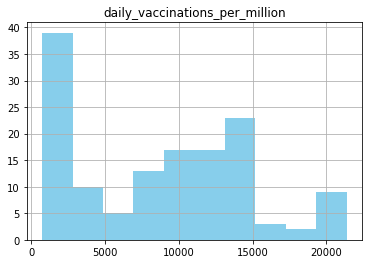

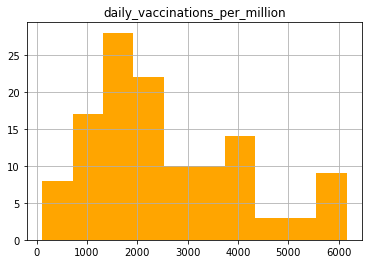

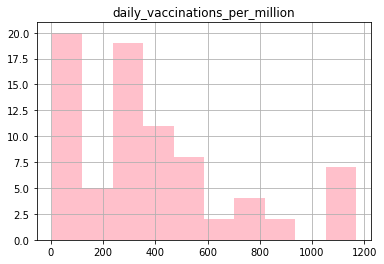

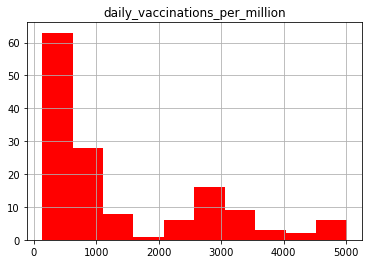

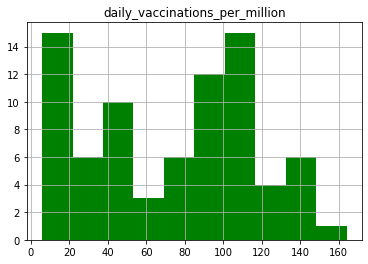

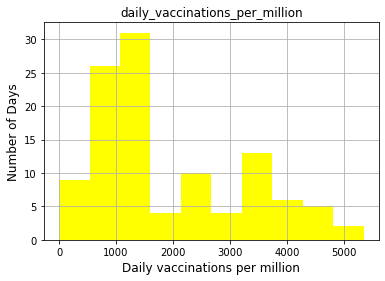

In [43]:
#bar chart
#From assigment 1

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter


df_us.hist('daily_vaccinations_per_million', bins=10, color = 'blue')
df_is.hist('daily_vaccinations_per_million', bins=10, color = 'skyblue')
df_ir.hist('daily_vaccinations_per_million', bins=10,color='orange')
df_jp.hist('daily_vaccinations_per_million', bins=10,color='pink')
df_ch.hist('daily_vaccinations_per_million', bins=10,color='red')
df_sa.hist('daily_vaccinations_per_million', bins=10,color='green')
df_bz.hist('daily_vaccinations_per_million', bins=10,color='yellow')


plt.xlabel('Daily vaccinations per million',fontsize=12);
plt.ylabel('Number of Days', fontsize=12);


So in the end, the results are a mixed bag. Some countries like Israel are doing an excellent job and have already reached the assumed level of herd immunity. Other countries like the US, Ireland, and Brazil are slowing ramping up vaccination rates. Hopefully these countries continue down the same path to herd immunity. Still, some countries like South Africa, with some of the worst outbreaks and variants are not show high vaccination rates at all. There may be a myriad of reasons for this, but that is beyond the scope of this class and best left to the public health professionals. 